<a href="https://colab.research.google.com/github/noeffortnomoney/CS114.L22.KHCL/blob/main/Sarcasm%20Headlines%20Dataset/Sarcasm_Headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DỮ LIỆU TỪ DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
url ='/drive/MyDrive/Sarcasm dataset/datasetFinal-datasetFinal.csv'
df=pd.read_csv(url)

In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df.head()

,is_sarcastic,headline,article_link
0,0,‘Two And A Half Men’ actress Conchata Ferrell ...,https://www.canindia.com/two-and-a-half-men-ac...
1,1,Extremely Polite: This Kid On Vacation With Hi...,https://clickhole.com/extremely-polite-this-ki...
2,1,"In testimony, Robert Mueller reaffirms commitm...",https://www.thebeaverton.com/2019/07/in-testim...
3,1,Abes Treatment Centre Opens in Winkler,https://dailybonnet.com/abes-treatment-centre-...
4,0,Rajkummar Rao reveals his birthday resolution,https://www.canindia.com/rajkummar-rao-reveals...


# **SHUFFLE DỮ LIỆU**

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

# **KIỂM TRA DỮ LIỆU**

In [ ]:
df.head()

,is_sarcastic,headline,article_link
0,0,French Frogs take third place in Online Shooti...,https://www.canindia.com/french-frogs-take-thi...
1,0,Chandan Roy Sanyal’s ‘bizarre’ experience of w...,https://www.canindia.com/chandan-roy-sanyals-b...
2,1,Exhausted Ontario PC staffers pull all-nighter...,https://www.thebeaverton.com/2019/05/exhausted...
3,1,TSN anchor cries tears of joy while reporting ...,https://www.thebeaverton.com/2013/01/tsn-ancho...
4,0,Russell hits the right tones after his smashin...,https://www.canindia.com/russell-hits-the-righ...


In [ ]:
df.shape

(45256, 3)

In [ ]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

Bộ dataset không có dữ liệu rỗng

In [ ]:
df.describe

<bound method NDFrame.describe of        is_sarcastic  ...                                       article_link
0                 1  ...  https://clickhole.com/taking-responsibility-ma...
1                 1  ...  https://clickhole.com/help-these-oafs-get-thei...
2                 0  ...  https://www.canindia.com/csk-survive-scare-bea...
3                 1  ...  https://www.thebeaverton.com/2017/08/trump-out...
4                 0  ...  https://www.canindia.com/ricky-kej-i-create-mu...
...             ...  ...                                                ...
45251             1  ...  https://www.cracked.com/article_30127_robert-l...
45252             0  ...  https://www.canindia.com/mumbai-beat-bagan-2-0...
45253             0  ...  https://www.canindia.com/why-aravinda-sametha-...
45254             0  ...  https://www.canindia.com/gaurav-gill-blazes-to...
45255             1  ...  https://www.betootaadvocate.com/sports/coach-o...

[45256 rows x 3 columns]>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


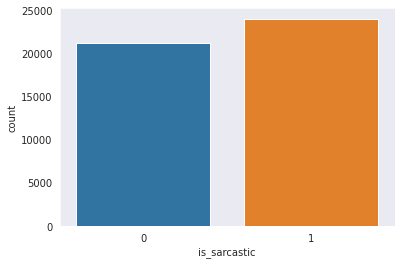

In [ ]:
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

Đây là dữ liệu cân bằng

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np
from csv import reader
import transformers
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from string import punctuation
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

# **LOẠI BỎ STOPWORDS**

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
punctuations = list(punctuation)
stop.update(punctuations)

# **LỌC DỮ LIỆU**

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

# **CHUYỂN CÁC HEADLINE THÀNH CÁC TOKENS ĐỂ FEED MODEL**

In [ ]:
sentences=[]
labels=[]
urls=[]

In [ ]:
for i in df.headline:
  sentences.append(i)
for i in df.is_sarcastic:
  labels.append(i)
for i in df.article_link:
  urls.append(i)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 35000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


38186
{'<OOV>': 1, 'new': 2, 'covid': 3, '19': 4, 'man': 5, 'says': 6, 'say': 7, 'find': 8, 'trump': 9, 'day': 10, 'get': 11, 'time': 12, '5': 13, 'win': 14, 'first': 15, 'people': 16, 'one': 17, 'like': 18, 'mennonite': 19, 'world': 20, 'local': 21, 'test': 22, 'india': 23, 'back': 24, 'year': 25, 'woman': 26, 'lockdown': 27, 'make': 28, 'film': 29, 'us': 30, 'video': 31, 'know': 32, '2': 33, 'league': 34, '7': 35, '6': 36, 'open': 37, 'singh': 38, 'old': 39, 'team': 40, 'government': 41, 'big': 42, 'life': 43, 'it’s': 44, 'star': 45, '1': 46, 'gets': 47, 'fans': 48, 'still': 49, 'would': 50, 'england': 51, 'home': 52, 'next': 53, 'years': 54, 'sushant': 55, 'series': 56, 'report': 57, 'family': 58, '3': 59, 'ipl': 60, 'play': 61, '2020': 62, 'shares': 63, 'good': 64, 'things': 65, 'take': 66, 'look': 67, 'never': 68, 'khan': 69, 'could': 70, 'show': 71, 'house': 72, 'best': 73, 'go': 74, 'every': 75, 'kapoor': 76, 'cup': 77, 'white': 78, 'going': 79, 'tv': 80, 'need': 81, 'way': 82, 

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# **TRAINING MODEL**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
1094/1094 - 5s - loss: 0.6038 - accuracy: 0.6784 - val_loss: 0.3637 - val_accuracy: 0.8920
Epoch 2/30
1094/1094 - 4s - loss: 0.2423 - accuracy: 0.9223 - val_loss: 0.1932 - val_accuracy: 0.9309
Epoch 3/30
1094/1094 - 4s - loss: 0.1556 - accuracy: 0.9441 - val_loss: 0.1576 - val_accuracy: 0.9400
Epoch 4/30
1094/1094 - 4s - loss: 0.1231 - accuracy: 0.9559 - val_loss: 0.1419 - val_accuracy: 0.9444
Epoch 5/30
1094/1094 - 4s - loss: 0.1025 - accuracy: 0.9633 - val_loss: 0.1520 - val_accuracy: 0.9398
Epoch 6/30
1094/1094 - 4s - loss: 0.0887 - accuracy: 0.9671 - val_loss: 0.1330 - val_accuracy: 0.9460
Epoch 7/30
1094/1094 - 4s - loss: 0.0766 - accuracy: 0.9724 - val_loss: 0.1473 - val_accuracy: 0.9434
Epoch 8/30
1094/1094 - 4s - loss: 0.0700 - accuracy: 0.9745 - val_loss: 0.1348 - val_accuracy: 0.9473
Epoch 9/30
1094/1094 - 4s - loss: 0.0636 - accuracy: 0.9765 - val_loss: 0.1537 - val_accuracy: 0.9414
Epoch 10/30
1094/1094 - 4s - loss: 0.0579 - accuracy: 0.9783 - val_loss: 0.1380 - 

# **EVALUATE**

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(training_padded,training_labels)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(testing_padded,testing_labels)[1]*100)

1094/1094 [==============================] - 1s 1ms/step - loss: 0.0094 - accuracy: 0.9979
Accuracy of the model on Training Data is -  99.785715341568
321/321 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.9391
Accuracy of the model on Testing Data is -  93.90600919723511


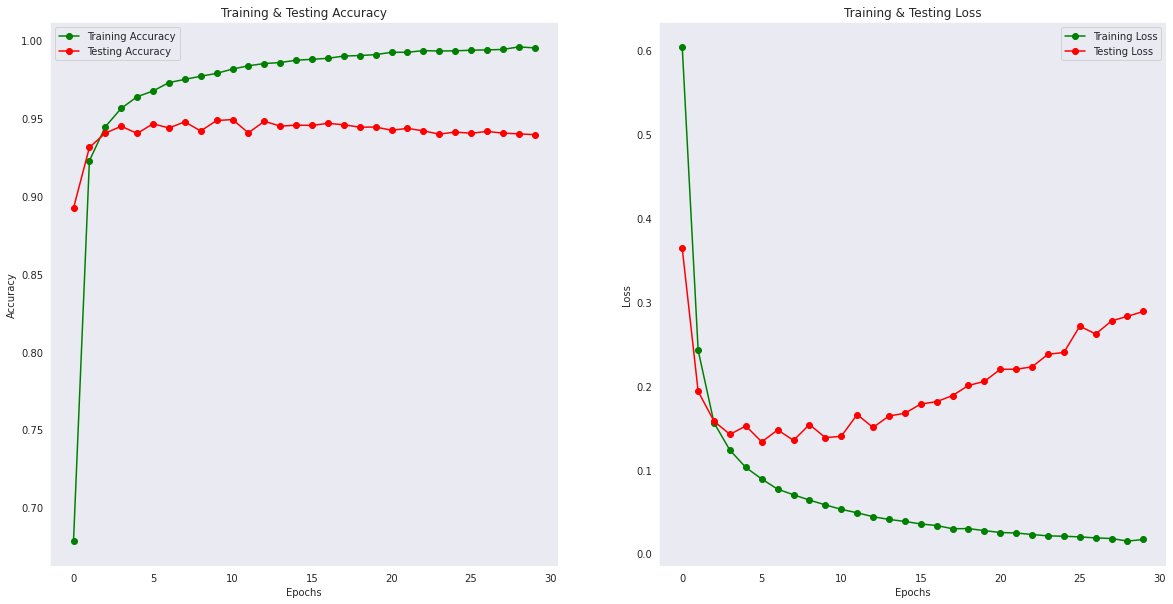

In [ ]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

Sau epoch thứ 3 thì mỗi lần train thì validation loss lại càng tăng. Không những thế regular loss lại nhỏ hơn validation loss. Model có dấu hiệu bị overfitting

Chúng ta sẽ nhập thử input vào để model dự đoán

In [ ]:
sentence = ["Six ways Hitler treated the jew, Number 5 will make you suprise", "Suns take 2-0 lead over Clippers with Deandre Ayton's winning dunk"]
sentencez=[]
for i in sentence:
  sentencez.append(denoise_text(i))
sequences = tokenizer.texts_to_sequences(sentencez)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.        ]
 [0.02804089]]


Lần này Model đã dự đoán đúng

# **CONFUSION MATRIX**

In [ ]:
pred = model.predict_classes(testing_padded)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
cm = confusion_matrix(testing_labels,pred)

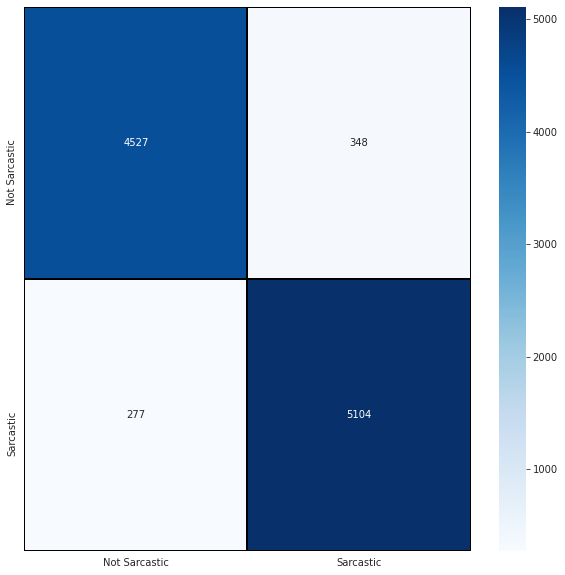

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])

In [ ]:
print(classification_report(testing_labels, pred))
print(confusion_matrix(testing_labels, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4875
           1       0.94      0.95      0.94      5381

    accuracy                           0.94     10256
   macro avg       0.94      0.94      0.94     10256
weighted avg       0.94      0.94      0.94     10256

[[4527  348]
 [ 277 5104]]


# **Nguồn tham khảo**
https://www.kaggle.com/madz2000/sarcasm-detection-with-glove-word2vec-83-accuracy

https://www.kaggle.com/yosrbali/sarcasm

https://www.youtube.com/watch?v=-8XmD2zsFBI&t=874s

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
